# Домашнее задание
## Задача 1
Построить модель линейной регрессии.
- линейная модель
- полином второй степени
- полином третьей степени
- экспонента 


Построить графики получившихся функций (линейная, квадратичная, кубическая, экспонента) и тренировочной выборки. 
- Посчитать MSE для каждого случая
- Выбрать наилучший вариант (без тестовой выборки)


Для решения можете использовать np.linalg.lstsq, np.polyfit, np.poly1d, scipy.stats.linregress, scipy.optimize.curve_fit, sklearn.linear_model.LinearRegression, statsmodels, np.linalg.solve (аналитически) или с помощью стохастического градиентного спуска (написать самостоятельно).

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

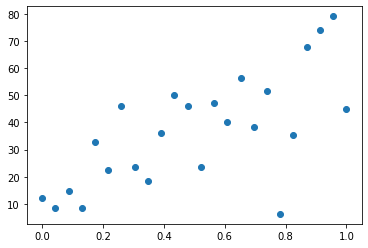

In [49]:
plt.scatter(x, y);

In [50]:
X = list(zip(np.ones(24), x, x*x))

In [51]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [52]:
W

array([12.1867    , 55.61441818, -9.10381818])

In [53]:
def f(x, w): 
    return w[0] + w[1]*x + w[2]*x*x

In [54]:
f(x, W)

array([12.1867    , 14.5875087 , 16.95389842, 19.28586917, 21.58342095,
       23.84655375, 26.07526759, 28.26956245, 30.42943834, 32.55489526,
       34.6459332 , 36.70255217, 38.72475217, 40.7125332 , 42.66589526,
       44.58483834, 46.46936245, 48.31946759, 50.13515375, 51.91642095,
       53.66326917, 55.37569842, 57.0537087 , 58.6973    ])

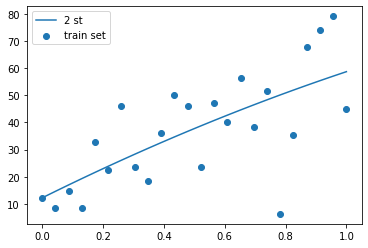

In [55]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='2 st')
plt.legend();

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
mean_squared_error(y, f(x, W))

212.59353678557315

In [58]:
X = list(zip(np.ones(24), x))

In [59]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [60]:
W

array([13.63803333, 46.5106    ])

In [61]:
def f(x, w): 
    return w[0] + w[1]*x

In [62]:
f(x, W)

array([13.63803333, 15.66023333, 17.68243333, 19.70463333, 21.72683333,
       23.74903333, 25.77123333, 27.79343333, 29.81563333, 31.83783333,
       33.86003333, 35.88223333, 37.90443333, 39.92663333, 41.94883333,
       43.97103333, 45.99323333, 48.01543333, 50.03763333, 52.05983333,
       54.08203333, 56.10423333, 58.12643333, 60.14863333])

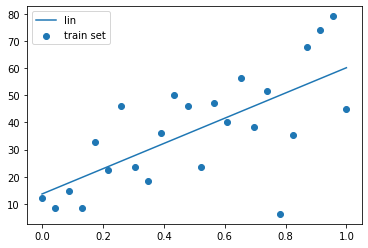

In [63]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='lin')
plt.legend();

In [64]:
mean_squared_error(y, f(x, W))

213.13469863888886

In [65]:
X = list(zip(np.ones(24), x, x*x, x*x*x))

In [66]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [67]:
W

array([   5.65033333,  143.52996465, -233.63225758,  149.68562626])

In [68]:
def f(x, w): 
    return w[0] + w[1]*x + w[2]*x*x + w[3]*x*x*x

In [69]:
f(x, W)

array([ 5.65033333, 11.46142029, 16.46302503, 20.72896311, 24.33305007,
       27.34910145, 29.85093281, 31.91235968, 33.60719763, 35.00926219,
       36.19236891, 37.23033333, 38.19697101, 39.1660975 , 40.21152833,
       41.40707905, 42.82656522, 44.54380237, 46.63260606, 49.16679183,
       52.22017523, 55.86657181, 60.1797971 , 65.23366667])

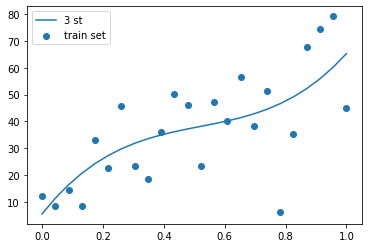

In [70]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='3 st')
plt.legend();

In [71]:
mean_squared_error(y, f(x, W))

202.513036590909

In [72]:
X = list(zip(np.ones(24), np.exp(x)))

In [73]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [74]:
W

array([-9.42279902, 26.85911292])

In [75]:
def f(x, w): 
    return w[0] + w[1]*np.exp(x)

In [76]:
f(x, W)

array([17.43631391, 18.62986007, 19.87644418, 21.17842312, 22.53825847,
       23.95852121, 25.44189658, 26.99118913, 28.60932804, 30.29937266,
       32.06451828, 33.90810219, 35.83360996, 37.84468208, 39.9451208 ,
       42.13889731, 44.43015931, 46.82323878, 49.32266021, 51.93314915,
       54.65964115, 57.50729105, 60.4814828 , 63.58783957])

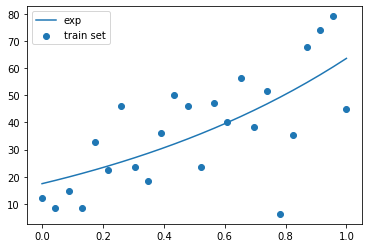

In [77]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='exp')
plt.legend();

In [78]:
mean_squared_error(y, f(x, W))

218.24309186403494

#Вывод:

1.   213.13469863888886 (MSE для полинома первой степени)
2.   212.59353678557315 (MSE для полинома второй степени)
3.   202.513036590909 (MSE для полинома третьей степени)
4.   218.24309186403494 (MSE для экспоненты)

Лучшей моделью является полином третьей степени (202.513036590909)





## Задача 2

Данные: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset 

1. Разделите данные на train/test или используйте кросс-валидацию (можно grid search)

2. Постройте несколько моделей линейной регрессии:
- sklearn.linear_model.LinearRegression
- sklearn.linear_model.Ridge
- sklearn.linear_model.Lasso
- sklearn.linear_model.ElasticNet
3. Для последних трёх вариантов попробуйте разные значения коэффициента регуляризации.
4. Сравните построенные модели по MSE на тестовой выборке (или через кросс-валидацию)
5. Какая модель оказалась наилучшей? Почему?

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
diabetes = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=4)

#LinearRegression

In [107]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [108]:
print('coef: ', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('R^2: ', regr.score(x_test,y_test))

coef:  [  33.40877011 -292.24672884  481.07153405  369.06269614 -966.37849405
  589.81383056  232.61924401  288.3263166   802.72704593   37.81285219]
Mean squared error: 2939.42
R^2:  0.4610882915687333


#Lasso

In [109]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [110]:
print('coef: ', lasso.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('R^2: ', lasso.score(x_test,y_test))

coef:  [   0.         -198.92007047  480.66671601  330.63402569  -26.57095924
   -0.         -209.48136823    0.          490.41780815    0.49979948]
Mean squared error: 2877.23
R^2:  0.4724898734589885


#Ridge

In [111]:
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

In [112]:
print('coef: ', ridge.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('R^2: ', ridge.score(x_test,y_test))

coef:  [  44.02025512 -241.69666596  452.98163524  332.04993719  -76.34010147
  -68.52063199 -164.98817213  149.9687712   431.61985919   58.51762582]
Mean squared error: 2894.59
R^2:  0.46930668289209754


#ElasticNet

In [113]:
el = linear_model.ElasticNet(alpha=0.1)
el.fit(x_train, y_train)
y_pred = el.predict(x_test)

In [114]:
print('coef: ', el.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('R^2: ', el.score(x_test,y_test))

coef:  [ 11.82723863  -0.          37.21052851  29.71528009  11.89857022
   8.0999657  -23.93173146  26.52631663  37.31170656  21.55686773]
Mean squared error: 4903.96
R^2:  0.10090965900443194


#Вывод
Лучшей моделью оказалась Lasso регрессия, потому что у нее наименьший mse.